<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/01_seleccion_de_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np

# Graphics
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Seleccion Univariada

Para esta seccion utilizaremos el set de datos de penguinos, y trataremos de predecir el Sexo del Pinguino utilizando las demas varaibles -> Y='sex'

Carguemos el set de datos de pinguinos.

In [36]:
# Load the penguin Dataset
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Eliminemos los missing y nan.
Cambiemos la varaible objetivo a 0 y 1 (Encoding)

In [37]:
# Lets get rid of the nan
penguins.dropna(inplace=True)
# Encode the sex
penguins.replace({'Male':0, 'Female':1}, inplace=True)

Utilicemos el metodo de Pandas get_dummies. (https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Recuerda utilizar el argumento drop_first=True, de lo contrario se creara una columna para cada valor de la variable lo cual causara problemas de colinealidad.

In [43]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [42]:
# Encode Species & island
pen = pd.get_dummies(penguins, columns=['species', 'island'], 
                          drop_first=True)
pen.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen'],
      dtype='object')

## Analicemos la Varianza

In [47]:
pen.std()/pen.mean()

bill_length_mm       0.124308
bill_depth_mm        0.114725
flipper_length_mm    0.069742
body_mass_g          0.191396
sex                  1.010568
species_Chinstrap    1.977068
species_Gentoo       1.343032
island_Dream         1.308610
island_Torgersen     2.470513
dtype: float64

## Analicemos sus correlaciones

In [39]:
pen.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,-0.344078,0.449098,0.488256,0.032118,-0.367821
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.372673,0.323505,-0.822293,0.457326,0.265173
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,-0.255169,-0.186175,0.866854,-0.425459,-0.273304
body_mass_g,0.589451,-0.472016,0.872979,1.000000,-0.424987,-0.298622,0.821178,-0.464666,-0.251369
sex,-0.344078,-0.372673,-0.255169,-0.424987,1.000000,0.004564,-0.012082,0.000673,0.012278
species_Chinstrap,0.449098,0.323505,-0.186175,-0.298622,0.004564,1.000000,-0.377744,0.661894,-0.205351
species_Gentoo,0.488256,-0.822293,0.866854,0.821178,-0.012082,-0.377744,1.000000,-0.570702,-0.302296
island_Dream,0.032118,0.457326,-0.425459,-0.464666,0.000673,0.661894,-0.570702,1.000000,-0.310248
island_Torgersen,-0.367821,0.265173,-0.273304,-0.251369,0.012278,-0.205351,-0.302296,-0.310248,1.000000


Analicemos la matriz de correlaciones con un Heatmap

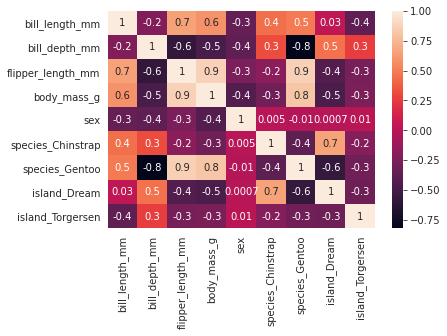

In [41]:
sns.heatmap(pen.corr(), annot = True, fmt='.1g')

## Chi-square

In [51]:
# Importemos chi2 de sklearn
from sklearn.feature_selection import chi2

In [59]:
X = pen.drop('sex', axis=1)
y = pen['sex']

chi_sq, p_val = chi2(X,y)
chi_values = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
chi_values.sort_values(ascending=True, by='p_value').round(3)


,variable,chi_sq,p_value
3,body_mass_g,9241.352,0.000
0,bill_length_mm,26.720,0.000
2,flipper_length_mm,21.130,0.000
1,bill_depth_mm,10.417,0.001
7,island_Torgersen,0.043,0.836
5,species_Gentoo,0.031,0.860
4,species_Chinstrap,0.006,0.941
6,island_Dream,0.000,0.992


# Predicciones

In [89]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_split(X, y,test_size=0.2,random_state=5874,scale_x=True, scale_y=False):
  # Split data
  x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size, 
                                                    random_state=random_state)
  # Scale X
  if scale_x:
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
  # Scale Y
  if scale_y:
    scaler = StandardScaler().fit(y_train)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

  return x_train, x_test, y_train, y_test



In [92]:
# Funcion de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def log_regression(x_train, x_test, y_train, y_test):
  
  #print(x_train.columns)
  # Train Logistic Model
  model = LogisticRegression()
  model.fit(x_train, y_train)

  #Test the model
  predictions = model.predict(x_test)

  #Check precision, recall, f1-score
  #print( '\n', classification_report(y_test, predictions) )
  print( 'Accuracy: ', accuracy_score(y_test, predictions))
  #print('\n Coefficients: \n', model.coef_)
  print('----------------------------------------------------------------')



In [113]:
# Create data set
X = pen.loc[:, pen.columns!='sex']
y = pen['sex']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                    test_size=0.2)
print(X.columns)
log_regression(x_train, x_test, y_train, y_test)

X
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen'],
      dtype='object')
Accuracy:  0.9253731343283582
----------------------------------------------------------------


Eliminemos las variables con baja correlacion o evidencia de idependencia respecto a y: 'species & island'

In [114]:
sub_set = [c for c in X.columns if ('island' not in c)]
sub_set = [c for c in sub_set if ('species' not in c)]

X = pen[sub_set]
y = pen['sex']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    test_size=0.2, 
                                                    random_state=5874)
print(X.columns)
log_regression(x_train, x_test, y_train, y_test)

X
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
Accuracy:  0.9253731343283582
----------------------------------------------------------------
